In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [2]:
import numpy as np
from astropy.table import Table
from astropy.io import fits

In [3]:
import cmd_plot
import jwst_plots

In [4]:
def filter_selection_mask(cat):
    filters_with_detections = ['f480m','f410m','f405n', 'f360m']
    #filters_without_detections = ['f150w', 'f182m', 'f187n', 'f210m', 'f212n',]
    # 300, 360, 466 are optional
    mask_with = np.logical_and.reduce([~np.isnan(cat[f'mag_ab_{band}']) for band in filters_with_detections])
    #mask_without = np.logical_and.reduce([np.isnan(cat[f'mag_ab_{band}']) for band in filters_without_detections])
    mask = mask_with
    #mask = np.logical_and(maks_with, mask_without)

    return mask

In [5]:
cat = jwst_plots.make_cat_raw()

In [8]:
snr_mask = cat.get_count_mask()
sum(snr_mask) - len(snr_mask)
filter_mask = filter_selection_mask(cat.catalog)
mask = np.logical_and.reduce([snr_mask, filter_mask])


In [9]:
cat.catalog = cat.catalog[mask]

In [47]:
filters = [colname[-5:] for colname in cat.colnames if colname.startswith('qf_')]

(-3.0, 2.0)

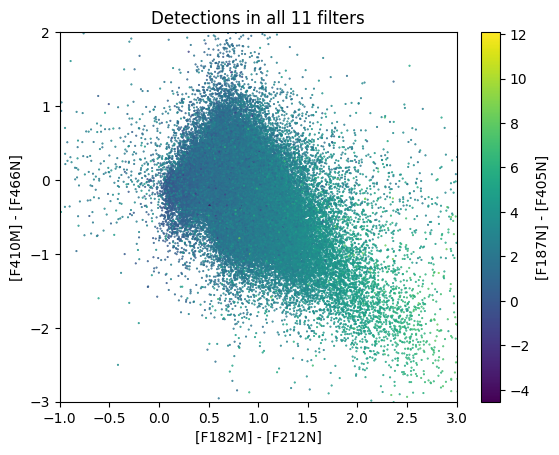

In [10]:
ax = cmd_plot.Plotter.plot_CCCD(cat,'f182m','f212n', 'f410m', 'f466n','f187n','f405n', marker = '.', s =1)
ax.set_title('Detections in all 11 filters')
ax.set_xlim(-1,3)
ax.set_ylim(-3,2)

Text(0.5, 1.0, 'Detections in all 11 filters')

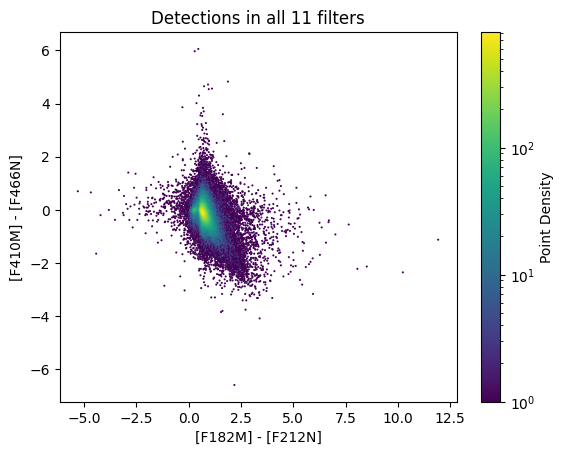

In [12]:
ax = cmd_plot.Plotter.plot_CCD_density(cat,'f182m','f212n', 'f410m', 'f466n', gridsize = 500)
ax.set_title('Detections in all 11 filters')
#ax.set_xlim(-2,3)
#ax.set_ylim(-3,2)
#ax.set_xlim(0,3)
#ax.set_ylim(-2.5,1.5)

In [13]:
cat_fn = '/orange/adamginsburg/jwst/sgrb2/NB/catalogs/crowdsource_nsky0_merged_photometry_tables_merged.fits'
cat = Table.read(cat_fn)
mask = filter_selection_mask(cat)
cat = cat[mask]

In [14]:
cat[:2]

skycoord_ref,skycoord_ref_filtername,sep_f480m,id_f480m,skycoord_f480m,x_f480m,y_f480m,flux_f480m,passno_f480m,dx_f480m,dy_f480m,dflux_f480m,qf_f480m,rchi2_f480m,fracflux_f480m,fluxlbs_f480m,dfluxlbs_f480m,fwhm_f480m,spread_model_f480m,dspread_model_f480m,fluxiso_f480m,xiso_f480m,yiso_f480m,flags_f480m,sky_f480m,mask_f480m,dra_f480m,ddec_f480m,flux_jy_f480m,eflux_jy_f480m,mag_ab_f480m,emag_ab_f480m,near_saturated_f480m_f480m,replaced_saturated_f480m,sep_f466n,id_f466n,skycoord_f466n,x_f466n,y_f466n,flux_f466n,passno_f466n,dx_f466n,dy_f466n,dflux_f466n,qf_f466n,rchi2_f466n,fracflux_f466n,fluxlbs_f466n,dfluxlbs_f466n,fwhm_f466n,spread_model_f466n,dspread_model_f466n,fluxiso_f466n,xiso_f466n,yiso_f466n,flags_f466n,sky_f466n,mask_f466n,dra_f466n,ddec_f466n,flux_jy_f466n,eflux_jy_f466n,mag_ab_f466n,emag_ab_f466n,near_saturated_f466n_f466n,replaced_saturated_f466n,sep_f410m,id_f410m,skycoord_f410m,x_f410m,y_f410m,flux_f410m,passno_f410m,dx_f410m,dy_f410m,dflux_f410m,qf_f410m,rchi2_f410m,fracflux_f410m,fluxlbs_f410m,dfluxlbs_f410m,fwhm_f410m,spread_model_f410m,dspread_model_f410m,fluxiso_f410m,xiso_f410m,yiso_f410m,flags_f410m,sky_f410m,mask_f410m,dra_f410m,ddec_f410m,flux_jy_f410m,eflux_jy_f410m,mag_ab_f410m,emag_ab_f410m,near_saturated_f410m_f410m,replaced_saturated_f410m,sep_f405n,id_f405n,skycoord_f405n,x_f405n,y_f405n,flux_f405n,passno_f405n,dx_f405n,dy_f405n,dflux_f405n,qf_f405n,rchi2_f405n,fracflux_f405n,fluxlbs_f405n,dfluxlbs_f405n,fwhm_f405n,spread_model_f405n,dspread_model_f405n,fluxiso_f405n,xiso_f405n,yiso_f405n,flags_f405n,sky_f405n,mask_f405n,dra_f405n,ddec_f405n,flux_jy_f405n,eflux_jy_f405n,mag_ab_f405n,emag_ab_f405n,near_saturated_f405n_f405n,replaced_saturated_f405n,sep_f360m,id_f360m,skycoord_f360m,x_f360m,y_f360m,flux_f360m,passno_f360m,dx_f360m,dy_f360m,dflux_f360m,qf_f360m,rchi2_f360m,fracflux_f360m,fluxlbs_f360m,dfluxlbs_f360m,fwhm_f360m,spread_model_f360m,dspread_model_f360m,fluxiso_f360m,xiso_f360m,yiso_f360m,flags_f360m,sky_f360m,mask_f360m,dra_f360m,ddec_f360m,flux_jy_f360m,eflux_jy_f360m,mag_ab_f360m,emag_ab_f360m,near_saturated_f360m_f360m,replaced_saturated_f360m,sep_f300m,id_f300m,skycoord_f300m,x_f300m,y_f300m,flux_f300m,passno_f300m,dx_f300m,dy_f300m,dflux_f300m,qf_f300m,rchi2_f300m,fracflux_f300m,fluxlbs_f300m,dfluxlbs_f300m,fwhm_f300m,spread_model_f300m,dspread_model_f300m,fluxiso_f300m,xiso_f300m,yiso_f300m,flags_f300m,sky_f300m,mask_f300m,dra_f300m,ddec_f300m,flux_jy_f300m,eflux_jy_f300m,mag_ab_f300m,emag_ab_f300m,near_saturated_f300m_f300m,replaced_saturated_f300m,sep_f212n,id_f212n,skycoord_f212n,x_f212n,y_f212n,flux_f212n,passno_f212n,dx_f212n,dy_f212n,dflux_f212n,qf_f212n,rchi2_f212n,fracflux_f212n,fluxlbs_f212n,dfluxlbs_f212n,fwhm_f212n,spread_model_f212n,dspread_model_f212n,fluxiso_f212n,xiso_f212n,yiso_f212n,flags_f212n,sky_f212n,mask_f212n,dra_f212n,ddec_f212n,flux_jy_f212n,eflux_jy_f212n,mag_ab_f212n,emag_ab_f212n,near_saturated_f212n_f212n,replaced_saturated_f212n,sep_f210m,id_f210m,skycoord_f210m,x_f210m,y_f210m,flux_f210m,passno_f210m,dx_f210m,dy_f210m,dflux_f210m,qf_f210m,rchi2_f210m,fracflux_f210m,fluxlbs_f210m,dfluxlbs_f210m,fwhm_f210m,spread_model_f210m,dspread_model_f210m,fluxiso_f210m,xiso_f210m,yiso_f210m,flags_f210m,sky_f210m,mask_f210m,dra_f210m,ddec_f210m,flux_jy_f210m,eflux_jy_f210m,mag_ab_f210m,emag_ab_f210m,near_saturated_f210m_f210m,replaced_saturated_f210m,sep_f187n,id_f187n,skycoord_f187n,x_f187n,y_f187n,flux_f187n,passno_f187n,dx_f187n,dy_f187n,dflux_f187n,qf_f187n,rchi2_f187n,fracflux_f187n,fluxlbs_f187n,dfluxlbs_f187n,fwhm_f187n,spread_model_f187n,dspread_model_f187n,fluxiso_f187n,xiso_f187n,yiso_f187n,flags_f187n,sky_f187n,mask_f187n,dra_f187n,ddec_f187n,flux_jy_f187n,eflux_jy_f187n,mag_ab_f187n,emag_ab_f187n,near_saturated_f187n_f187n,replaced_saturated_f187n,sep_f182m,id_f182m,skycoord_f182m,x_f182m,y_f182m,flux_f182m,passno_f182m,dx_f182m,dy_f182m,dflux_f182m,qf_f182m,rchi2_f182m,fracflux_f182m,fluxlbs_f182m,dfluxlbs_f182m,fwhm_f182m,spread_model_f182m,dspread_mod

In [58]:
def plot_CCD_density(cat, band1, band2, band3, band4, gridsize=50, ax=None, save = False, **kwargs):
    if ax is None:
        ax = plt.gca()

    mags1 = cat[f'mag_ab_{band1}']
    mags2 = cat[f'mag_ab_{band2}']
    mags3 = cat[f'mag_ab_{band3}']
    mags4 = cat[f'mag_ab_{band4}']

    color1 = mags1 - mags2
    color2 = mags3 - mags4


    # Hexbin plot
    hb = ax.hexbin(color1, color2, gridsize=gridsize, cmap='viridis', norm=LogNorm(), **kwargs)

    # Labels
    ax.set_xlabel(f'[{band1.upper()}] - [{band2.upper()}]')
    ax.set_ylabel(f'[{band3.upper()}] - [{band4.upper()}]')
    plt.colorbar(hb, ax=ax, label='Point Density')

    # determine appropriate limits:
    f = 7
    xlim = (np.mean(color1) - f * np.std(color1), np.mean(color1) + f * np.std(color1))
    ylim = (np.mean(color2) - f * np.std(color2), np.mean(color2) + f * np.std(color2))
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    if save:
        plt.savefig(f'/orange/adamginsburg/jwst/sgrb2/NB/catalogs/catalog_attempt_Jan2025/catalog_plotting/pngs/CCD_density_{band1}_{band2}_{band3}_{band4}.png', dpi=200)

    return ax

In [59]:
def plot_CMD_density(cat, band1, band2, band3, gridsize=50, ax=None, save = False, **kwargs):
    # Color-Magnitude Diagram
    if ax is None:
        ax = plt.gca()
    color = cat[f'mag_ab_{band1}'] - cat[f'mag_ab_{band2}']
    magnitude = cat[f'mag_ab_{band3}']


    hb = ax.hexbin(color, magnitude, gridsize=gridsize, cmap='viridis', norm=LogNorm(), **kwargs)

    ax.set_xlabel(f'[{band1.upper()}] - [{band2.upper()}]')
    ax.set_ylabel(f'[{band3.upper()}]')
    plt.gca().invert_yaxis()
    plt.colorbar(hb, ax=ax, label='Point Density')
    
    f = 7
    xlim = (np.mean(color) - f * np.std(color), np.mean(color) + f * np.std(color))
    ylim = (np.mean(magnitude) - f * np.std(magnitude), np.mean(magnitude) + f * np.std(magnitude))
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    if save:
        plt.savefig(f'/orange/adamginsburg/jwst/sgrb2/NB/catalogs/catalog_attempt_Jan2025/catalog_plotting/pngs/CMD_density_{band1}_{band2}_{band3}.png', dpi=200)
    return ax

0.36941098741107314 0.46019164053511835


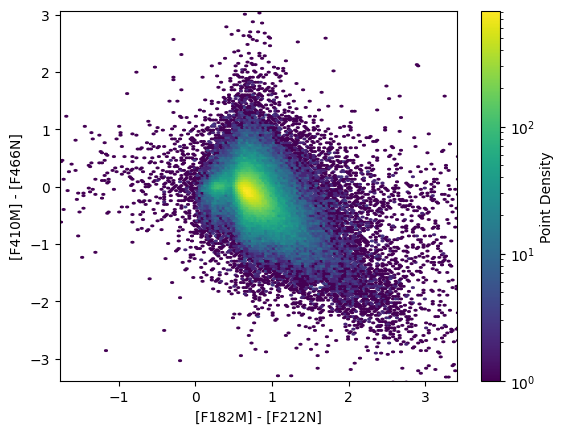

In [44]:
ax = plot_CCD_density(cat,'f182m','f212n', 'f410m', 'f466n', gridsize = 500, save = True)
#ax.set_xlim(-2,3)
#ax.set_ylim(-3,2)
#ax.set_xlim(0,3)
#ax.set_ylim(-2.5,1.5)

<Axes: xlabel='[F182M] - [F480M]', ylabel='[F480M]'>

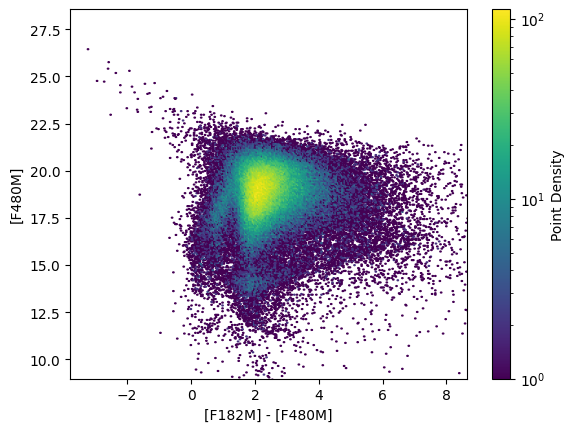

In [45]:
plot_CMD_density(cat, 'f182m', 'f480m', 'f480m', gridsize=500)

In [ ]:
filters = [colname[-5:] for colname in self.catalog.colnames if colname.startswith('qf_')]


In [48]:
import itertools

In [57]:
for band1, band2 in itertools.combinations(filters, 2):
    for band3, band4 in itertools.combinations(filters, 2):
        if band4 > band3:
            try:
                print(f"Plotting: {band1}, {band2} vs {band3}, {band4}")
                ax = plot_CCD_density(cat, band1, band2, band3, band4,
                                      gridsize=500, save=True)
                plt.clf()
            except Exception as e:
                print(f"Skipping {band1}-{band2} vs {band3}-{band4} due to error: {e}")

Plotting: f150w, f182m vs f150w, f182m
0.49808810326533715 0.49808810326533715
Plotting: f150w, f182m vs f150w, f187n
0.49808810326533715 0.5430394093673184
Plotting: f150w, f182m vs f150w, f210m
0.49808810326533715 0.6959245971969978
Plotting: f150w, f182m vs f150w, f212n
0.49808810326533715 0.7185632064082963
Plotting: f150w, f182m vs f150w, f300m
0.49808810326533715 0.6094100536188501
Plotting: f150w, f182m vs f150w, f360m
0.49808810326533715 0.912048198400715
Plotting: f150w, f182m vs f150w, f405n
0.49808810326533715 1.1243572513882698
Plotting: f150w, f182m vs f150w, f410m
0.49808810326533715 1.068345808877732
Plotting: f150w, f182m vs f150w, f466n
0.49808810326533715 0.9362730483905514
Plotting: f150w, f182m vs f150w, f480m
0.49808810326533715 1.129920943951053
Plotting: f150w, f182m vs f182m, f187n
0.49808810326533715 0.20066029120798773
Plotting: f150w, f182m vs f182m, f210m
0.49808810326533715 0.3371803044270136
Plotting: f150w, f182m vs f182m, f212n
0.49808810326533715 0.3694

<Figure size 640x480 with 0 Axes>

In [60]:
for band1, band2 in itertools.combinations(filters, 2):  # band2 > band1 ensures color is "blue - red"
    for band3 in filters:  # no restriction on the magnitude band
        try:
            print(f"Plotting CMD: ({band1} - {band2}) vs {band3}")
            ax = plot_CMD_density(cat, band1, band2, band3, gridsize=500, save=True)
            plt.clf()
        except Exception as e:
            print(f"Skipping CMD {band1}-{band2}-{band3} due to error: {e}")

Plotting CMD: (f150w - f182m) vs f150w
Plotting CMD: (f150w - f182m) vs f182m
Plotting CMD: (f150w - f182m) vs f187n
Plotting CMD: (f150w - f182m) vs f210m
Plotting CMD: (f150w - f182m) vs f212n
Plotting CMD: (f150w - f182m) vs f300m
Plotting CMD: (f150w - f182m) vs f360m
Plotting CMD: (f150w - f182m) vs f405n
Plotting CMD: (f150w - f182m) vs f410m
Plotting CMD: (f150w - f182m) vs f466n
Plotting CMD: (f150w - f182m) vs f480m
Plotting CMD: (f150w - f187n) vs f150w
Plotting CMD: (f150w - f187n) vs f182m
Plotting CMD: (f150w - f187n) vs f187n
Plotting CMD: (f150w - f187n) vs f210m
Plotting CMD: (f150w - f187n) vs f212n
Plotting CMD: (f150w - f187n) vs f300m
Plotting CMD: (f150w - f187n) vs f360m
Plotting CMD: (f150w - f187n) vs f405n
Plotting CMD: (f150w - f187n) vs f410m
Plotting CMD: (f150w - f187n) vs f466n
Plotting CMD: (f150w - f187n) vs f480m
Plotting CMD: (f150w - f210m) vs f150w
Plotting CMD: (f150w - f210m) vs f182m
Plotting CMD: (f150w - f210m) vs f187n
Plotting CMD: (f150w - f2

<Figure size 640x480 with 0 Axes>

In [56]:
filters

['f150w',
 'f182m',
 'f187n',
 'f210m',
 'f212n',
 'f300m',
 'f360m',
 'f405n',
 'f410m',
 'f466n',
 'f480m']